# Data Analysis with Blinkit Dataset

In [1]:
import numpy as np              # Numerical operations
import pandas as pd             # Data manipulation and analysis
import matplotlib.pyplot as plt # Plotting

import seaborn as sns           # Enhanced plotting library
import scipy.stats as stats     # Statistical functions

In [2]:
# Read the grocery data into a Pandas DataFrame

df = pd.read_csv('BlinkIT-Grocery-Data.csv')

In [3]:
# Visualize the dataset.

df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
# Shape of the dataset.

df.shape

(8523, 12)

In [6]:
# Columns names in the dataset.

list(df.columns)

['Item Fat Content',
 'Item Identifier',
 'Item Type',
 'Outlet Establishment Year',
 'Outlet Identifier',
 'Outlet Location Type',
 'Outlet Size',
 'Outlet Type',
 'Item Visibility',
 'Item Weight',
 'Sales',
 'Rating']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Outlet Establishment Year,8523.0,2016.450546,3.189396,2011.000,2014.000000,2016.000000,2018.000000,2022.000000
Item Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Sales,8523.0,140.992783,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Rating,8523.0,3.965857,0.605651,1.000,4.000000,4.000000,4.200000,5.000000


In [14]:
df.describe(include='O').T

,count,unique,top,freq
Item Fat Content,8523,5,Low Fat,5089
Item Identifier,8523,1559,FDW13,10
Item Type,8523,16,Fruits and Vegetables,1232
Outlet Identifier,8523,10,OUT027,935
Outlet Location Type,8523,3,Tier 3,3350
Outlet Size,8523,3,Medium,3631
Outlet Type,8523,4,Supermarket Type1,5577


In [15]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

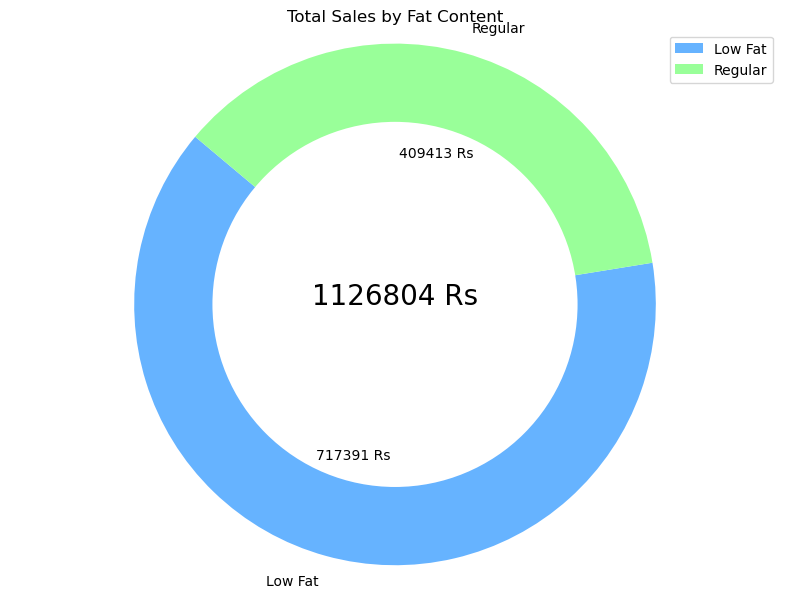

In [23]:
# Filter data for only 'Low Fat' and 'Regular'
filtered_df = df[df['Item Fat Content'].isin(['Low Fat', 'Regular'])]

# Group by 'Item Fat Content' and sum the 'Sales'
sales_by_fat_content = filtered_df.groupby('Item Fat Content')['Sales'].sum().reset_index()

# Calculate total sales
total_sales = sales_by_fat_content['Sales'].sum()

# Plotting
plt.figure(figsize=(8, 6))

# Colors for the pie chart
colors = ['#66b3ff', '#99ff99']

# Plotting the pie chart
wedges, texts, autotexts = plt.pie(sales_by_fat_content['Sales'], labels=sales_by_fat_content['Item Fat Content'], colors=colors, autopct=lambda x: '{:.0f} Rs'.format(x * total_sales / 100), startangle=140)

# Add a circle at the center of pie to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the total sales in the middle of the donut chart
plt.text(0, 0, '{:.0f} Rs'.format(total_sales), color='black', fontsize=20, ha='center')

# Adding title and legend
plt.title('Total Sales by Fat Content')
plt.legend(sales_by_fat_content['Item Fat Content'], loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

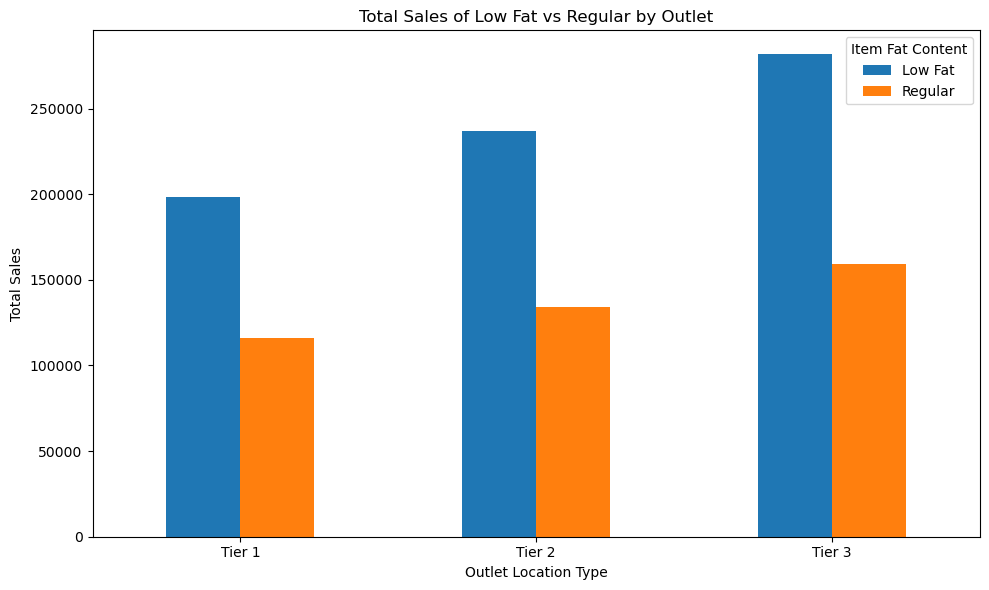

In [19]:
# Filter data for only 'Low Fat' and 'Regular'
filtered_df = df[df['Item Fat Content'].isin(['Low Fat', 'Regular'])]

# Group by 'Item Fat Content' and 'Outlet Identifier' and sum the 'Sales'
sales_by_fat_outlet = filtered_df.groupby(['Item Fat Content', 'Outlet Location Type'])['Sales'].sum().reset_index()

# Pivot the data to create a suitable format for plotting
pivot_df = sales_by_fat_outlet.pivot(index='Outlet Location Type', columns='Item Fat Content', values='Sales')

# Plotting
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))

# Adding labels and title
plt.title('Total Sales of Low Fat vs Regular by Outlet')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Item Fat Content')

plt.tight_layout()
plt.show()